In [13]:
from dlisio import dlis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

pd.set_option('display.max_rows', 50)

# extracting lab 

In [14]:
# loading lab_data from an Excel file
name = 'HRDH_1867'
lab_data = pd.read_excel("../HRDH_LAB_DATA.xlsx", sheet_name=name, index_col='Depth_ft')

lab_data


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerit e,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectit e,...,XRD_Dickite,XRD_Chlorit e,XRD_Mixed Clay,XRD_Anhydrit e,XRD_Gypsum,XRD_Pyrite,XRD_Anatase,XRD_Iron,XRD_Halite,XRD_Hematit e
Depth_ft,,,,,,,,,,,,,,,,,,,,,
14859,1,0,0,0,0.0,95.4,0,0.0,3.4,0,...,0.0,0.5,0,0,0,0,0.3,0,0.4,0
14859,2,0,0,0,0.0,90.6,0,0.0,8.8,0,...,0.0,0.2,0,0,0,0,0.0,0,0.4,0
14860,3,0,0,0,0.0,88.0,9,9.0,10.0,0,...,0.0,0.7,0,0,0,0,0.3,0,1.0,0
14872,4,0,0,0,0.0,74.1,0,0.0,23.5,0,...,0.0,2.4,0,0,0,0,0.0,0,0.0,0
14872,5,0,0,0,0.0,75.0,0,0.0,23.0,0,...,0.0,2.0,0,0,0,0,0.0,0,0.0,0
14872,6,0,0,0,0.0,85.0,0,0.0,13.5,0,...,0.0,1.5,0,0,0,0,0.0,0,0.0,0
14895,7,0,0,0,0.0,99.0,0,0.0,0.7,0,...,0.0,0.3,0,0,0,0,0.0,0,0.0,0
14895,8,0,0,0,0.0,99.4,0,0.0,0.1,0,...,0.0,0.5,0,0,0,0,0.0,0,0.0,0
14913,9,0,0,0,0.0,98.9,0,0.0,0.7,0,...,0.0,0.4,0,0,0,0,0.0,0,0.0,0


In [15]:

# convert data types to float
lab_data = lab_data.apply(pd.to_numeric, errors='coerce')


print("\nLAB DATAFRAME STRUCTURE:")
print(f"Index: {lab_data.index.name} (shape: {lab_data.index.shape})")
print(f"Columns: {list(lab_data.columns)} (shape: {lab_data.shape},)")
# print(f"Data types:\n{lab_data.info()}\n")



lab_data


LAB DATAFRAME STRUCTURE:
Index: Depth_ft (shape: (21,))
Columns: ['Sample_ID', 'XRD_Calcite', 'XRD_Dolomite', 'XRD_Ankerit e', 'XRD_Siderite', 'XRD_Quartz', 'XRD_Plagioclase', 'XRD_K-Feldspar', 'XRD_Illite/Mica', 'XRD_Smectit e', 'XRD_Kaolinit e', 'XRD_Dickite', 'XRD_Chlorit e', 'XRD_Mixed Clay', 'XRD_Anhydrit e', 'XRD_Gypsum', 'XRD_Pyrite', 'XRD_Anatase', 'XRD_Iron', 'XRD_Halite', 'XRD_Hematit e'] (shape: (21, 21),)


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerit e,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectit e,...,XRD_Dickite,XRD_Chlorit e,XRD_Mixed Clay,XRD_Anhydrit e,XRD_Gypsum,XRD_Pyrite,XRD_Anatase,XRD_Iron,XRD_Halite,XRD_Hematit e
Depth_ft,,,,,,,,,,,,,,,,,,,,,
14859,1,0,0,0,0.0,95.4,0,0.0,3.4,0,...,0.0,0.5,0,0,0,0,0.3,0,0.4,0
14859,2,0,0,0,0.0,90.6,0,0.0,8.8,0,...,0.0,0.2,0,0,0,0,0.0,0,0.4,0
14860,3,0,0,0,0.0,88.0,9,9.0,10.0,0,...,0.0,0.7,0,0,0,0,0.3,0,1.0,0
14872,4,0,0,0,0.0,74.1,0,0.0,23.5,0,...,0.0,2.4,0,0,0,0,0.0,0,0.0,0
14872,5,0,0,0,0.0,75.0,0,0.0,23.0,0,...,0.0,2.0,0,0,0,0,0.0,0,0.0,0
14872,6,0,0,0,0.0,85.0,0,0.0,13.5,0,...,0.0,1.5,0,0,0,0,0.0,0,0.0,0
14895,7,0,0,0,0.0,99.0,0,0.0,0.7,0,...,0.0,0.3,0,0,0,0,0.0,0,0.0,0
14895,8,0,0,0,0.0,99.4,0,0.0,0.1,0,...,0.0,0.5,0,0,0,0,0.0,0,0.0,0
14913,9,0,0,0,0.0,98.9,0,0.0,0.7,0,...,0.0,0.4,0,0,0,0,0.0,0,0.0,0


# extracting log dlis

In [16]:
from Module import load_full_dsl_log, dlis_to_df
import os
from pathlib import Path
import traceback
import glob
import pandas as pd


# Path to the DLIS log file 
dir_path = r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1867_0"

log_df, meta = load_full_dsl_log(
    root_dir=dir_path,
    frame_idx=0,
    channels=None 
)

# Display summary
print(f"\n📊 LOADING SUMMARY:")
print(f"Files found: {meta['summary']['total_files_found']}")
print(f"DSL files: {meta['summary']['dsl_files_found']}")
print(f"Successfully loaded: {meta['summary']['files_loaded']}")
print(f"Failed to load: {meta['summary']['files_failed']}")
print(f"Final shape: {meta['summary']['final_shape']}")

if not log_df.empty:
    print(f"Depth range: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
    print(f"Available channels: {list(log_df.columns)}")
else:
    print("No data loaded - check errors above")

log_df    

🔍 Found 82 total DLIS files
📊 Found 1 DSL-specific files
⚠️ No priority match for HRDH_1241_1_22OCT2016_ZDL-CN-DSL_BAT, using first file: HRDH_1241_1_22OCT2016_ZDL-CN-DSL_BAT.dlis
📁 Selected 1 files for loading
🗑️ Ignored 0 duplicate files

🔧 Loading file 1/1: HRDH_1241_1_22OCT2016_ZDL-CN-DSL_BAT.dlis
🔍 STEP 1: FILE VALIDATION
✅ File found: HRDH_1241_1_22OCT2016_ZDL-CN-DSL_BAT.dlis
   • Size: 1.1 MB
   • Path: \\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1867_0\5875\WL\Geoscience\Raw_Files_During_QC\offset\HRDH_1241_1_22OCT2016_ZDL-CN-DSL_BAT.dlis

🔍 STEP 2: DLIS FILE LOADING
✅ DLIS file loaded successfully
   • Number of logical files: 1
   • Using logical file: unnamed

🔍 STEP 3: FRAME VALIDATION
✅ Found 1 frame(s)
   • Frame 0: 0_250000B0
✅ Selected frame 0: 0_250000B0

🔍 STEP 4: CHANNEL ANALYSIS
✅ Found 32 channels:
    1. TDEP            | 0.250000 ft frame 0 depth      | Dim: [1] | Units: ft
    2. BIT             | Bit size  

,BIT,CALX,CN,CNC,FRAMENO,GR,GRSLC,KC,KTHC,LSN,...,SSN,TEN,THC,TTEN,UC,WRM,WTBH,ZCOR,ZDEN,ZDNC
TDEP,,,,,,,,,,,,,,,,,,,,,
14127.50,-999.250,-999.25,-999.25,-999.25,1,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-0.452891,2.594391,2.587122
14127.75,-999.250,-999.25,-999.25,-999.25,2,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-0.457553,2.581799,2.574598
14128.00,-999.250,-999.25,-999.25,-999.25,3,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-0.462216,2.569207,2.562075
14128.25,-999.250,-999.25,-999.25,-999.25,4,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-0.465597,2.561596,2.554506
14128.50,-999.250,-999.25,-999.25,-999.25,5,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,258.368103,-0.468977,2.553985,2.546937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083.50,5.875,-999.25,-999.25,-999.25,7825,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.250000,-999.250000,-999.250000
16083.75,5.875,-999.25,-999.25,-999.25,7826,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.250000,-999.250000,-999.250000
16084.00,5.875,-999.25,-999.25,-999.25,7827,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.250000,-999.250000,-999.250000


In [17]:

# You now have a complete log dataset:
print(f"📊 Final log data: {log_df.shape}")
print(f"📏 Depth coverage: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
print(f"🔍 Available channels: {len(log_df.columns)} {list(log_df.columns)}")




📊 Final log data: (7829, 32)
📏 Depth coverage: 14127.5 - 16084.5 ft
🔍 Available channels: 32 ['BIT', 'CALX', 'CN', 'CNC', 'FRAMENO', 'GR', 'GRSLC', 'KC', 'KTHC', 'LSN', 'PE', 'RTHKC', 'RTHUC', 'RUKC', 'SEQ', 'SFT2', 'SHR', 'SIGF', 'SLGN', 'SLTM', 'SPD', 'SSD', 'SSN', 'TEN', 'THC', 'TTEN', 'UC', 'WRM', 'WTBH', 'ZCOR', 'ZDEN', 'ZDNC']


# cleaning log

In [18]:

# -999.25 are usually null values inside dlis files
null_values = -999.25

# Replace -999.25 with NaN FIRST
log_df_clean = log_df.replace(null_values, np.nan)
log_df_clean




,BIT,CALX,CN,CNC,FRAMENO,GR,GRSLC,KC,KTHC,LSN,...,SSN,TEN,THC,TTEN,UC,WRM,WTBH,ZCOR,ZDEN,ZDNC
TDEP,,,,,,,,,,,,,,,,,,,,,
14127.50,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.452891,2.594391,2.587122
14127.75,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.457553,2.581799,2.574598
14128.00,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.462216,2.569207,2.562075
14128.25,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.465597,2.561596,2.554506
14128.50,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258.368103,-0.468977,2.553985,2.546937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083.50,5.875,NaN,NaN,NaN,7825,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16083.75,5.875,NaN,NaN,NaN,7826,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16084.00,5.875,NaN,NaN,NaN,7827,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# DEPTH ANALYSIS: Compare sampling characteristics between log and lab data
print("=" * 50)

print("Log depths summary:")
print(f"Count: {len(log_df_clean.index)}")  
print(f"Range: {log_df_clean.index.min():.1f} - {log_df_clean.index.max():.1f} ft\n")  
log_step = np.diff(log_df_clean.index).mean()  
print(f"Depth step (mean): {log_step:.2f} ft \nMin Step: {np.diff(log_df_clean.index).min():.2f} \nMax Step: {np.diff(log_df_clean.index).max():.2f}")  


print("=" * 50)


print("Lab depths summary:")
print(f"Count: {len(lab_data.index)}") 
print(f"Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft\n")  
lab_step = np.diff(lab_data.index).mean()  
print(f"Depth step (mean): {lab_step:.2f} ft \nMin Step: {np.diff(lab_data.index).min():.2f} \nMax Step: {np.diff(lab_data.index).max():.2f}")  


Log depths summary:
Count: 7829
Range: 14127.5 - 16084.5 ft

Depth step (mean): 0.25 ft 
Min Step: 0.25 
Max Step: 0.25
Lab depths summary:
Count: 21
Range: 14859.0 - 15025.0 ft

Depth step (mean): 8.30 ft 
Min Step: 0.00 
Max Step: 73.00


# Log MISSING DATA SUMMARY

In [20]:
#Missing Data Summary for log data
# Calculate missingness summary
null_pct = log_df_clean.isna().mean() * 100

# Show all columns with their percentages
missing_cols = null_pct.sort_values(ascending=False)

# Show aggregate summary statistics for many columns
print("🔍 MISSING DATA SUMMARY:")
print("=" * 50)
print(f"Log DATASET: {log_df_clean.shape[0]} samples × {log_df_clean.shape[1]} curves")

print(f"Total columns: {len(null_pct)}")
print(f"Columns with missing data: {len(missing_cols)}")
print(f"Max missing %: {null_pct.max():.1f}%")
print(f"Avg missing %: {null_pct.mean():.1f}%")

# Quick check for duplicates
# print("\n🔍 DUPLICATE DEPTH CHECK:")
# print(f"Log duplicates: {log_df_clean.index.duplicated().sum()}")
# print(f"Lab duplicates: {lab_data.index.duplicated().sum()}")

# # Show unique vs total counts
# print(f"\nLog depths - Total: {len(log_df_clean)}, Unique: {log_df_clean.index.nunique()}")
# print(f"Lab depths - Total: {len(lab_data)}, Unique: {lab_data.index.nunique()}")

print("=" * 50)


# Show detailed breakdown for all columns
for col, pct in missing_cols.items():
    count = log_df_clean[col].isna().sum()
    print(f"• {col:<20}: {pct:>6.1f}% ({count} missing)")




🔍 MISSING DATA SUMMARY:
Log DATASET: 7829 samples × 32 curves
Total columns: 32
Columns with missing data: 32
Max missing %: 92.2%
Avg missing %: 6.6%
• RTHUC               :   92.2% (7218 missing)
• GRSLC               :    8.9% (696 missing)
• KTHC                :    8.9% (696 missing)
• KC                  :    8.9% (696 missing)
• RTHKC               :    8.9% (696 missing)
• RUKC                :    8.9% (696 missing)
• THC                 :    8.9% (696 missing)
• UC                  :    8.9% (696 missing)
• CALX                :    4.9% (381 missing)
• CNC                 :    3.4% (269 missing)
• CN                  :    2.9% (225 missing)
• SSN                 :    2.9% (225 missing)
• GR                  :    2.8% (221 missing)
• LSN                 :    2.8% (221 missing)
• SPD                 :    2.8% (219 missing)
• WRM                 :    2.8% (218 missing)
• TEN                 :    2.8% (218 missing)
• TTEN                :    2.8% (218 missing)
• WTBH              

# OVERLAP

In [21]:
# OVERLAP ZONE ANALYSIS: Identify common depth intervals for data integration
print("🔍 DETAILED OVERLAP ZONE ANALYSIS:")
print("=" * 50)

# Dataset coverage comparison
print(f"📏 Depth Ranges:")
print(f"Log Range: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")  
print(f"Lab Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft")  

# Calculate overlap zone boundaries
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start

print("=" * 50)

print(f"Overlap Range: {overlap_start:.1f} - {overlap_end:.1f} ft")
print(f"Span of overlap: {overlap_span:.1f} ft")

# Coverage percentages
lab_total_span = lab_data.index.max() - lab_data.index.min()
log_total_span = log_df_clean.index.max() - log_df_clean.index.min()
overlap_lab_pct = (overlap_span / lab_total_span) * 100
overlap_log_pct = (overlap_span / log_total_span) * 100

print(f"Coverage: {overlap_lab_pct:.1f}% of lab data, {overlap_log_pct:.1f}% of log data")
print("=" * 50)

# Get samples in overlap zone
log_overlap = log_df_clean[(log_df_clean.index >= overlap_start) & (log_df_clean.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

# Calculate Step statistics in overlap zone
if len(log_overlap) > 1:
    log_step_overlap = np.diff(log_overlap.index)
    print(f"LOG STEP IN OVERLAP:")
    print(f"Step (mean): {log_step_overlap.mean():.2f} ft")
    print(f"Min: {log_step_overlap.min():.2f} ft \nStep Max: {log_step_overlap.max():.2f}")
    # print(f"Step Std: {log_step_overlap.std():.2f} ft")

if len(lab_overlap) > 1:
    lab_step_overlap = np.diff(lab_overlap.index)
    print(f"\nLAB STEP IN OVERLAP:")
    print(f"Step (mean): {lab_step_overlap.mean():.2f} ft")
    print(f"Min: {lab_step_overlap.min():.2f} ft \nStep Max: {lab_step_overlap.min():.2f}")
    # print(f"Step Std: {lab_step_overlap.std():.2f} ft")

print("=" * 50)

# Show actual depths in overlap zone
print(f"📍 SAMPLE DEPTHS IN OVERLAP ZONE:")
print(f"🔵 Log depths (first/last 5 of {len(log_overlap):,}):")
if len(log_overlap) > 0:
    # Show first 5
    for i, depth in enumerate(log_overlap.index[:5]):
        print(f"   {i+1:2d}. {depth:.2f} ft")
    if len(log_overlap) > 10:
        print("   ...")
        # Show last 5
        for i, depth in enumerate(log_overlap.index[-5:], start=len(log_overlap)-4):
            print(f"  {i:2d}. {depth:.2f} ft")

print(f"🔴 Lab depths (all {len(lab_overlap)}):")
if len(lab_overlap) > 0:
    for i, depth in enumerate(lab_overlap.index):
        print(f"   {i+1:2d}. {depth:.1f} ft")

#display depths in a df
# Display lab_overlap and log_df_clean side by side for the overlap zone

print("Lab Overlap Samples:")
display(lab_overlap)

print("Log Data:")
display(log_df_clean.loc[log_df_clean.index])

# Data quality assessment for overlap zone
# print(f"\n⭐ OVERLAP ZONE ASSESSMENT:")
# if overlap_span >= 100:
#     print(f"✅ Overlap span: EXCELLENT ({overlap_span:.1f} ft)")
# elif overlap_span >= 50:
#     print(f"⚠️ Overlap span: GOOD ({overlap_span:.1f} ft)")
# else:
#     print(f"❌ Overlap span: POOR ({overlap_span:.1f} ft)")

# if len(lab_overlap) >= 5:
#     print(f"✅ Lab samples: SUFFICIENT ({len(lab_overlap)} samples)")
# elif len(lab_overlap) >= 3:
#     print(f"⚠️ Lab samples: LIMITED ({len(lab_overlap)} samples)")
# else:
#     print(f"❌ Lab samples: INSUFFICIENT ({len(lab_overlap)} samples)")

# if len(log_overlap) >= 100:
#     print(f"✅ Log samples: EXCELLENT ({len(log_overlap):,} samples)")
# elif len(log_overlap) >= 50:
#     print(f"⚠️ Log samples: GOOD ({len(log_overlap)} samples)")
# else:
#     print(f"❌ Log samples: POOR ({len(log_overlap)} samples)")

# Recommendations based on overlap analysis
# print(f"\n💡 OVERLAP RECOMMENDATIONS:")
# if overlap_span < 50:
#     print(f"Consider requesting more lab samples in {overlap_start:.0f}-{overlap_end:.0f} ft zone")
# if len(lab_overlap) < 3:
#     print(f"Minimum 3-5 lab samples needed for reliable")
# if overlap_log_pct < 20:
#     print(f"Overlap covers only {overlap_log_pct:.1f}% of log data - limited analysis scope")
# if overlap_lab_pct < 50:
#     print(f"Consider expanding log coverage to match lab sampling range")

# print(f"\n📊 INTEGRATION POTENTIAL:")
# integration_score = (min(overlap_span/100, 1) * 0.4 + 
#                     min(len(lab_overlap)/5, 1) * 0.3 + 
#                     min(len(log_overlap)/100, 1) * 0.3) * 100

# if integration_score >= 80:
#     print(f"🟢 EXCELLENT ({integration_score:.0f}/100) - Ready for comprehensive analysis")
# elif integration_score >= 60:
#     print(f"🟡 GOOD ({integration_score:.0f}/100) - Suitable for targeted analysis")
# else:
#     print(f"🔴 POOR ({integration_score:.0f}/100) - Limited analysis potential")


🔍 DETAILED OVERLAP ZONE ANALYSIS:
📏 Depth Ranges:
Log Range: 14127.5 - 16084.5 ft
Lab Range: 14859.0 - 15025.0 ft
Overlap Range: 14859.0 - 15025.0 ft
Span of overlap: 166.0 ft
Coverage: 100.0% of lab data, 8.5% of log data
LOG STEP IN OVERLAP:
Step (mean): 0.25 ft
Min: 0.25 ft 
Step Max: 0.25

LAB STEP IN OVERLAP:
Step (mean): 8.30 ft
Min: 0.00 ft 
Step Max: 0.00
📍 SAMPLE DEPTHS IN OVERLAP ZONE:
🔵 Log depths (first/last 5 of 665):
    1. 14859.00 ft
    2. 14859.25 ft
    3. 14859.50 ft
    4. 14859.75 ft
    5. 14860.00 ft
   ...
  661. 15024.00 ft
  662. 15024.25 ft
  663. 15024.50 ft
  664. 15024.75 ft
  665. 15025.00 ft
🔴 Lab depths (all 21):
    1. 14859.0 ft
    2. 14859.0 ft
    3. 14860.0 ft
    4. 14872.0 ft
    5. 14872.0 ft
    6. 14872.0 ft
    7. 14895.0 ft
    8. 14895.0 ft
    9. 14913.0 ft
   10. 14913.0 ft
   11. 14986.0 ft
   12. 14986.0 ft
   13. 14986.0 ft
   14. 14997.0 ft
   15. 14997.0 ft
   16. 15008.0 ft
   17. 15008.0 ft
   18. 15008.0 ft
   19. 15025.0 ft
   

,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerit e,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectit e,...,XRD_Dickite,XRD_Chlorit e,XRD_Mixed Clay,XRD_Anhydrit e,XRD_Gypsum,XRD_Pyrite,XRD_Anatase,XRD_Iron,XRD_Halite,XRD_Hematit e
Depth_ft,,,,,,,,,,,,,,,,,,,,,
14859,1,0,0,0,0.0,95.4,0,0.0,3.4,0,...,0.0,0.5,0,0,0,0,0.3,0,0.4,0
14859,2,0,0,0,0.0,90.6,0,0.0,8.8,0,...,0.0,0.2,0,0,0,0,0.0,0,0.4,0
14860,3,0,0,0,0.0,88.0,9,9.0,10.0,0,...,0.0,0.7,0,0,0,0,0.3,0,1.0,0
14872,4,0,0,0,0.0,74.1,0,0.0,23.5,0,...,0.0,2.4,0,0,0,0,0.0,0,0.0,0
14872,5,0,0,0,0.0,75.0,0,0.0,23.0,0,...,0.0,2.0,0,0,0,0,0.0,0,0.0,0
14872,6,0,0,0,0.0,85.0,0,0.0,13.5,0,...,0.0,1.5,0,0,0,0,0.0,0,0.0,0
14895,7,0,0,0,0.0,99.0,0,0.0,0.7,0,...,0.0,0.3,0,0,0,0,0.0,0,0.0,0
14895,8,0,0,0,0.0,99.4,0,0.0,0.1,0,...,0.0,0.5,0,0,0,0,0.0,0,0.0,0
14913,9,0,0,0,0.0,98.9,0,0.0,0.7,0,...,0.0,0.4,0,0,0,0,0.0,0,0.0,0


Log Data:


,BIT,CALX,CN,CNC,FRAMENO,GR,GRSLC,KC,KTHC,LSN,...,SSN,TEN,THC,TTEN,UC,WRM,WTBH,ZCOR,ZDEN,ZDNC
TDEP,,,,,,,,,,,,,,,,,,,,,
14127.50,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.452891,2.594391,2.587122
14127.75,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.457553,2.581799,2.574598
14128.00,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.462216,2.569207,2.562075
14128.25,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.465597,2.561596,2.554506
14128.50,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258.368103,-0.468977,2.553985,2.546937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083.50,5.875,NaN,NaN,NaN,7825,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16083.75,5.875,NaN,NaN,NaN,7826,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16084.00,5.875,NaN,NaN,NaN,7827,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# join

In [22]:
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd
from Module import match_lab_to_log

tolerance_ft = 1

joined = match_lab_to_log(log_df_clean, lab_overlap, tol=tolerance_ft)

if len(joined) > 0:
    print(f"\n✅ Found {len(joined)} matches with {tolerance_ft} ft tolerance")
    
    # Show statistics
    print(f"\nMATCH STATISTICS:")
    print(f"Average distance: {joined['Distance'].mean():.3f} ft")
    print(f"Max distance: {joined['Distance'].max():.3f} ft")
    print(f"Exact matches: {(joined['Distance'] == 0).sum()}")
    print(f"Near matches: {(joined['Distance'] > 0).sum()}")
    
    # Save results for verification
    verification_df = joined[['Lab_Depth', 'Log_Depth', 'Distance']].copy()
    verification_df.to_csv('verification_matches.csv', index=False)
    print(f"\n💾 Saved verification data to 'verification_matches.csv'")
    
else:
    print(f"\n❌ No matches found with {tolerance_ft} ft tolerance")
    print("Trying with larger tolerance...")
    
    # Try with diffrent ft tolerance
    joined = match_lab_to_log(log_df_clean, lab_overlap, tol=1)

joined


FUNCTION START - INPUT VALIDATION:
Log DataFrame shape: (7829, 32)
Lab DataFrame shape: (21, 21)
After deduplication - Log: 7829, Lab: 9
Lab depths range: 14859.00 - 15025.00
Log depths range: 14127.50 - 16084.50
Tolerance: 1 ft
Valid matches found: 9/9
Min distance: 0.00 ft
Max distance: 0.00 ft

MATCH VERIFICATION:
   Match 1: Lab 14859.00 → Log 14859.00 (Δ0.00 ft)
   Match 2: Lab 14860.00 → Log 14860.00 (Δ0.00 ft)
   Match 3: Lab 14872.00 → Log 14872.00 (Δ0.00 ft)
   Match 4: Lab 14895.00 → Log 14895.00 (Δ0.00 ft)
   Match 5: Lab 14913.00 → Log 14913.00 (Δ0.00 ft)
   Match 6: Lab 14986.00 → Log 14986.00 (Δ0.00 ft)
   Match 7: Lab 14997.00 → Log 14997.00 (Δ0.00 ft)
   Match 8: Lab 15008.00 → Log 15008.00 (Δ0.00 ft)
   Match 9: Lab 15025.00 → Log 15025.00 (Δ0.00 ft)
Matched samples extracted: 9 pairs

✅ Found 9 matches with 1 ft tolerance

MATCH STATISTICS:
Average distance: 0.000 ft
Max distance: 0.000 ft
Exact matches: 9
Near matches: 0

💾 Saved verification data to 'verification_m

,Lab_Depth,Lab_Sample_ID,Lab_XRD_Calcite,Lab_XRD_Dolomite,Lab_XRD_Ankerit e,Lab_XRD_Siderite,Lab_XRD_Quartz,Lab_XRD_Plagioclase,Lab_XRD_K-Feldspar,Lab_XRD_Illite/Mica,...,Log_THC,Log_TTEN,Log_UC,Log_WRM,Log_WTBH,Log_ZCOR,Log_ZDEN,Log_ZDNC,Distance,Match_Type
0,14859,1,0,0,0,0.0,95.4,0,0.0,3.4,...,9.775,6408.826172,0.721,0.038454,272.282410,0.069266,2.417226,2.410058,0.0,Exact
1,14860,3,0,0,0,0.0,88.0,9,9.0,10.0,...,7.595,6407.804688,1.379,0.041351,271.884430,0.060209,2.378018,2.371154,0.0,Exact
2,14872,4,0,0,0,0.0,74.1,0,0.0,23.5,...,6.697,6395.333984,0.365,0.050549,271.338135,0.009564,2.222496,2.216946,0.0,Exact
3,14895,7,0,0,0,0.0,99.0,0,0.0,0.7,...,6.115,6475.528320,0.140,0.038819,272.734772,0.089026,2.486370,2.477868,0.0,Exact
4,14913,9,0,0,0,0.0,98.9,0,0.0,0.7,...,5.130,6385.160156,2.548,0.039615,272.843018,0.034850,2.316993,2.310214,0.0,Exact
5,14986,11,0,0,0,1.4,96.8,0,0.0,1.8,...,6.715,6438.422363,1.174,0.031998,272.757324,0.002118,2.550232,2.542840,0.0,Exact
6,14997,14,0,0,0,0.0,56.0,0,15.0,9.9,...,13.921,6485.920898,5.822,0.031668,273.962006,0.029283,2.495028,2.487613,0.0,Exact
7,15008,16,0,0,0,4.9,93.4,0,0.0,0.8,...,9.218,6444.970703,7.172,0.043874,273.911316,0.048024,2.563349,2.555620,0.0,Exact
8,15025,19,0,0,0,0.8,95.6,0,0.0,1.6,...,8.627,6515.682129,4.337,0.043006,274.120544,0.025871,2.559518,2.551849,0.0,Exact


# DATA INTEGRATION ASSESSMENT

In [23]:
# COMPREHENSIVE DATA INTEGRATION ASSESSMENT
print("COMPREHENSIVE DATA INTEGRATION ASSESSMENT")
print("=" * 60)

# 1. Basic Statistics
lab_coverage = (len(joined) / len(lab_data)) * 100
log_coverage = (len(joined) / len(log_df_clean)) * 100

lab_span = lab_data.index.max() - lab_data.index.min()
log_span = log_df_clean.index.max() - log_df_clean.index.min()

matched_span = joined['Lab_Depth'].max() - joined['Lab_Depth'].min()
avg_depth_diff = abs(joined['Log_Depth'] - joined['Lab_Depth']).mean()

print(f"📊 DATA OVERVIEW:")
print(f"   • Lab samples: {len(lab_data)} | Log samples: {len(log_df_clean)}")
print(f"   • Matched pairs: {len(joined)}")
# print(f"   • Data ratio: 1 lab sample per {len(log_df_clean)//len(lab_data)} log samples") not usful

# 2. Coverage Analysis
print(f"\n📈 COVERAGE ANALYSIS:")
print(f"   • Lab utilization: {lab_coverage:.1f}% ({len(joined)}/{len(lab_data)})")
print(f"   • Log coverage: {log_coverage:.1f}% ({len(joined)}/{len(log_df_clean)})")

# 3. Depth Range Analysis
print(f"\n📏 DEPTH RANGE ANALYSIS:")
print(f"   • Lab data span: {lab_span:.1f} ft")
print(f"   • Log data span: {log_span:.1f} ft")
print(f"   • Matched (joined) span: {matched_span:.1f} ft")
print(f"   • Lab covers {(lab_span/log_span)*100:.1f}% of well depth")

# 4. Depth Accuracy
print(f"\n🎯 DEPTH ACCURACY:")
print(f"   • Average depth difference: {avg_depth_diff:.2f} ft")
print(f"   • Max depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).max():.2f} ft")
print(f"   • Min depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).min():.2f} ft")


# 6. Overlap Analysis
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start
print(f"\n🔄 OVERLAP ZONE ANALYSIS:")
print(f"Overlap zone: {overlap_start:.1f} - {overlap_end:.1f} ft")

# Get samples in overlap zone - FIXED the bug
log_overlap = joined[(joined.index >= overlap_start) & (joined.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

print(f"Log samples in overlap: {len(log_overlap)}")
print(f"Lab samples in overlap: {len(lab_overlap)}")



# 7. Quality Assessment
print(f"\n⭐ QUALITY ASSESSMENT:")
if lab_coverage >= 80:
    print(f"   ✅ Lab utilization: EXCELLENT ({lab_coverage:.1f}%)")
elif lab_coverage >= 60:
    print(f"   ⚠️ Lab utilization: GOOD ({lab_coverage:.1f}%)")
else:
    print(f"   ❌ Lab utilization: POOR ({lab_coverage:.1f}%)")


if avg_depth_diff <= 1:
    print(f"   ✅ Depth accuracy: EXCELLENT ({avg_depth_diff:.2f} ft)")
elif avg_depth_diff <= 2:
    print(f"   ⚠️ Depth accuracy: GOOD ({avg_depth_diff:.2f} ft)")
else:
    print(f"   ❌ Depth accuracy: POOR ({avg_depth_diff:.2f} ft)")

# 8. Overall Assessment
excellent_count = sum([lab_coverage >= 80, log_coverage >= 50, matched_span >= 100, avg_depth_diff <= 1])
good_count = sum([60 <= lab_coverage < 80, 20 <= log_coverage < 50, 50 <= matched_span < 100, 1 < avg_depth_diff <= 2])

print(f"\n🏆 OVERALL ASSESSMENT:")
if excellent_count >= 3:
    print(f"   ✅ EXCELLENT - Ready for comprehensive analysis")
elif excellent_count + good_count >= 3:
    print(f"   ⚠️ GOOD - Suitable for limited analysis")
else:
    print(f"   ❌ POOR - Needs improvement before analysis")



print(f"\n📝 SUMMARY: Lab utilization is {lab_coverage:.1f}%, but only {log_coverage:.1f}% log coverage.")

COMPREHENSIVE DATA INTEGRATION ASSESSMENT
📊 DATA OVERVIEW:
   • Lab samples: 21 | Log samples: 7829
   • Matched pairs: 9

📈 COVERAGE ANALYSIS:
   • Lab utilization: 42.9% (9/21)
   • Log coverage: 0.1% (9/7829)

📏 DEPTH RANGE ANALYSIS:
   • Lab data span: 166.0 ft
   • Log data span: 1957.0 ft
   • Matched (joined) span: 166.0 ft
   • Lab covers 8.5% of well depth

🎯 DEPTH ACCURACY:
   • Average depth difference: 0.00 ft
   • Max depth difference: 0.00 ft
   • Min depth difference: 0.00 ft

🔄 OVERLAP ZONE ANALYSIS:
Overlap zone: 14859.0 - 15025.0 ft
Log samples in overlap: 0
Lab samples in overlap: 21

⭐ QUALITY ASSESSMENT:
   ❌ Lab utilization: POOR (42.9%)
   ✅ Depth accuracy: EXCELLENT (0.00 ft)

🏆 OVERALL ASSESSMENT:
   ❌ POOR - Needs improvement before analysis

📝 SUMMARY: Lab utilization is 42.9%, but only 0.1% log coverage.


# Visualizations  

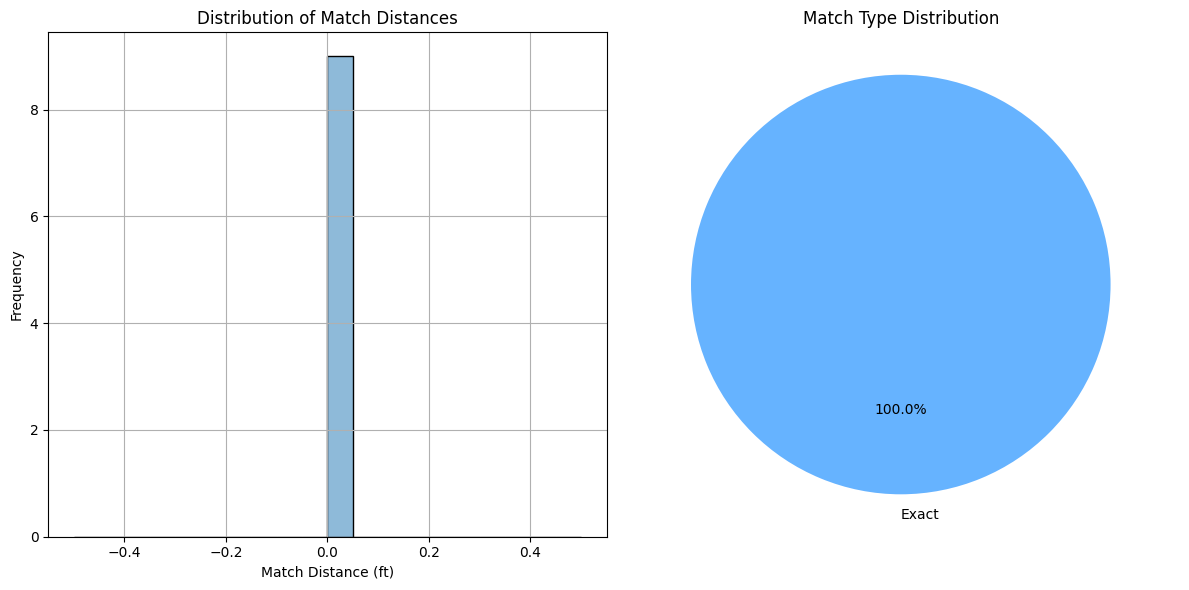

In [24]:
# Visualize the quality of matches
plt.figure(figsize=(12, 6))

# Left plot: Distance histogram
plt.subplot(1, 2, 1)
sns.histplot(joined['Distance'], bins=20, kde=True)
plt.xlabel('Match Distance (ft)')
plt.ylabel('Frequency')
plt.title('Distribution of Match Distances')
plt.grid(True)

# Right plot: Match types
plt.subplot(1, 2, 2)
match_counts = joined['Match_Type'].value_counts()
plt.pie(match_counts, labels=match_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#99ff99'], startangle=90)
plt.axis('equal')
plt.title('Match Type Distribution')

plt.tight_layout()
plt.savefig('match_quality.png', dpi=300, bbox_inches='tight')
plt.show()

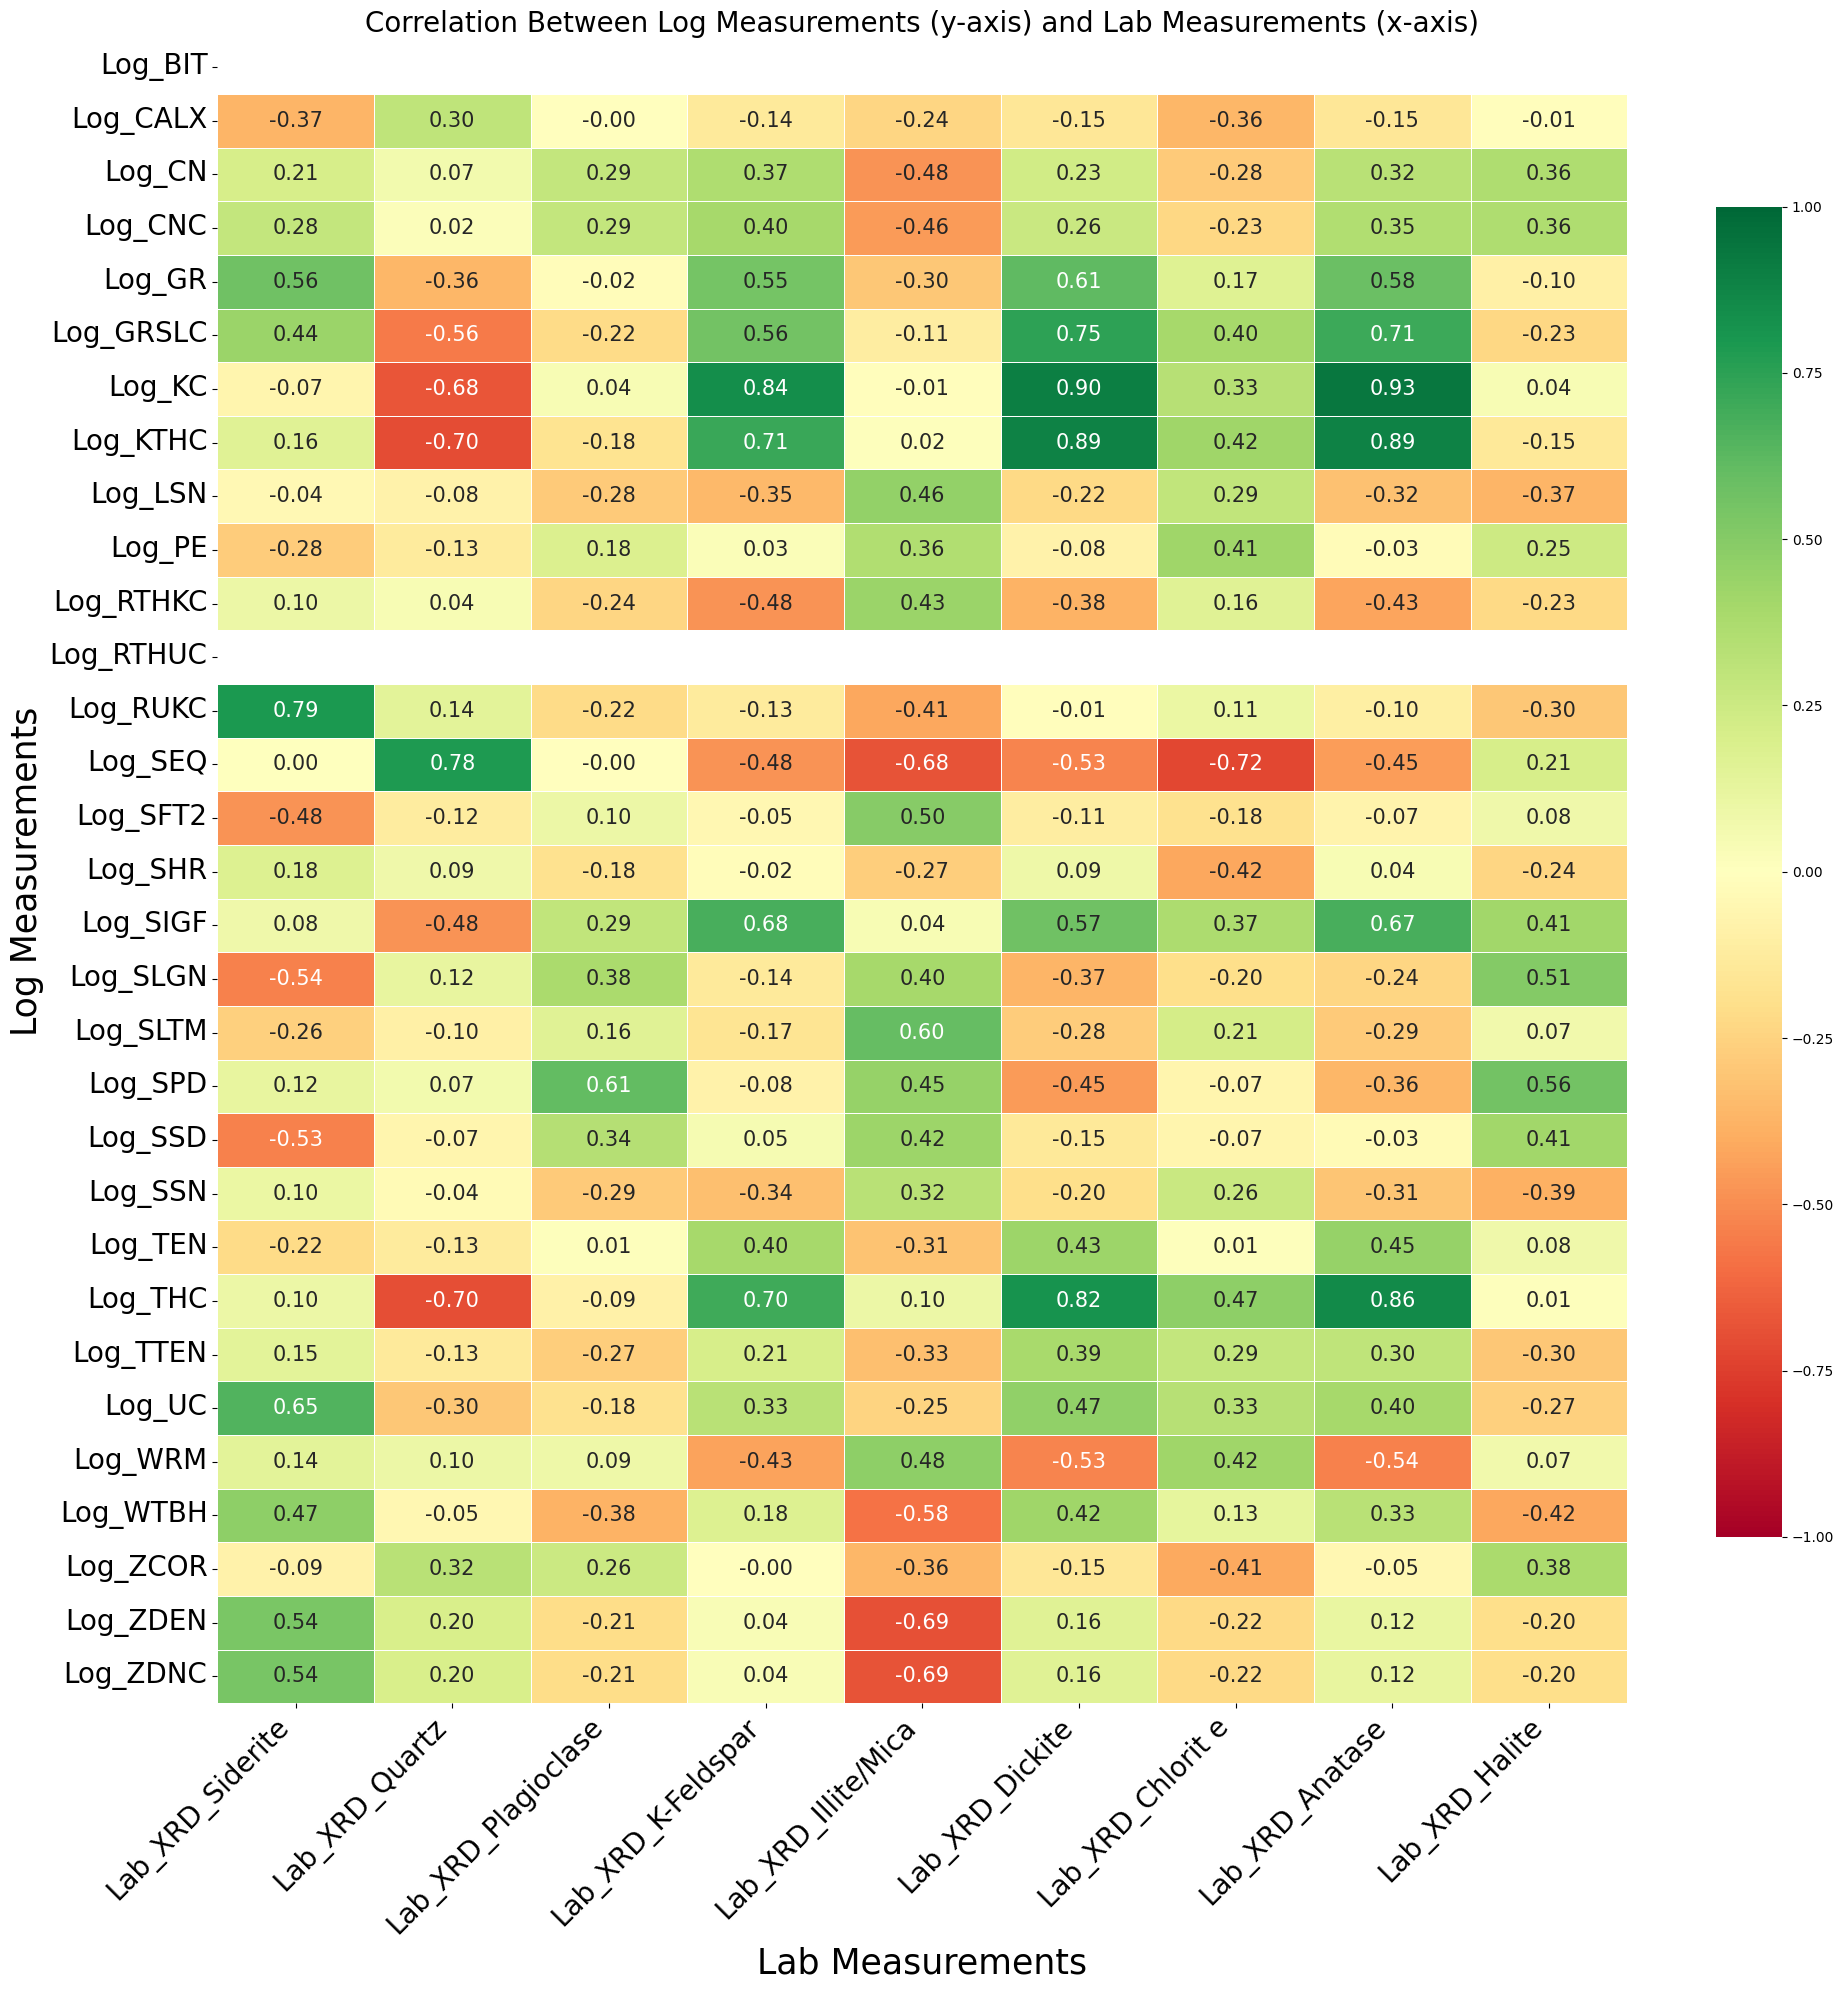

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter for all lab measurement columns (excluding non-measurement columns)
lab_vars = [col for col in joined.columns if col.startswith('Lab_') and 
           col not in ['Lab_Depth', 'Lab_Sample_ID']]

# Filter for all log measurement columns (excluding non-measurement or auxiliary columns)
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# Filter out columns where all values are 0
lab_vars = [col for col in lab_vars if not (joined[col] == 0).all()]
log_vars = [col for col in log_vars if not (joined[col] == 0).all()]


# print(len(lab_vars), "lab variables")
# print("Lab variables:", lab_vars)
# print(len(log_vars), "log variables")

# Compute correlation matrix (log variables as rows, lab variables as columns)
corr_matrix = joined[lab_vars + log_vars].corr().loc[log_vars, lab_vars]

# Create a larger figure for better readability
plt.figure(figsize=(20, 20))

# Plot the heatmap with rotated x-axis labels
sns.heatmap(corr_matrix, 
            annot=True,                  # Show correlation values
            cmap='RdYlGn',               # Use a diverging colormap
            annot_kws={'size': 15},       # Annotation font size
            vmin=-1, vmax=1,             # Fixed scale for correlation values
            linewidths=0.5,              # Add line separators
            fmt='.2f',                   # Format as 2 decimal places
            cbar_kws={"shrink": 0.8})    # Adjust colorbar
            

#  labeling and styling
plt.title('Correlation Between Log Measurements (y-axis) and Lab Measurements (x-axis)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)      
plt.yticks(fontsize=20)                   

# Add clearer axis labels
plt.xlabel('Lab Measurements', fontsize=25, )
plt.ylabel('Log Measurements', fontsize=25, )

plt.tight_layout()
plt.savefig('correlation_heatmap_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# =============== 1. INTERACTIVE DEPTH PROFILE ===============

def create_interactive_depth_profile(data):
    """Create an interactive multi-track well log visualization"""
    
    # Create subplot structure
    fig = make_subplots(
        rows=1, 
        cols=4,
        shared_yaxes=True,
        subplot_titles=("Log Curves", "Spectral GR", "XRD Mineralogy", "XRF Elements"),
        horizontal_spacing=0.02
    )
    
    # Track 1: Log Curves - GR and Density
    fig.add_trace(
        go.Scatter(x=data['Log_GR'], y=data['Lab_Depth'], mode='lines+markers', 
                  name='Gamma Ray', line=dict(color='red')),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Scatter(x=data['Log_ZDEN'], y=data['Lab_Depth'], mode='lines+markers',
                  name='Density', line=dict(color='blue', dash='dash')),
        row=1, col=1
    )
    
    # Track 2: Spectral GR Components
    fig.add_trace(
        go.Scatter(x=data['Log_U'], y=data['Lab_Depth'], mode='lines+markers',
                  name='Uranium', line=dict(color='green')),
        row=1, col=2
    )
    
    fig.add_trace(
        go.Scatter(x=data['Log_TH'], y=data['Lab_Depth'], mode='lines+markers',
                  name='Thorium', line=dict(color='purple')),
        row=1, col=2
    )
    
    fig.add_trace(
        go.Scatter(x=data['Log_K'], y=data['Lab_Depth'], mode='lines+markers',
                  name='Potassium', line=dict(color='orange')),
        row=1, col=2
    )
    
    # Track 3: XRD Mineralogy
    minerals = ['Lab_XRD_Quartz', 'Lab_XRD_Calcite', 'Lab_XRD_Dolomite', 'Lab_XRD_Anhydrite']
    mineral_colors = ['gold', 'lightgray', 'brown', 'darkgray']
    
    # Sort data by depth for proper visualization
    sorted_data = data.sort_values('Lab_Depth')
    
    for i, mineral in enumerate(minerals):
        fig.add_trace(
            go.Scatter(
                x=sorted_data[mineral], 
                y=sorted_data['Lab_Depth'],
                mode='lines+markers',
                name=mineral.replace('Lab_XRD_', ''),
                line=dict(color=mineral_colors[i])
            ),
            row=1, col=3
        )
    
    # Track 4: XRF Elements
    elements = ['Lab_XRF_Si', 'Lab_XRF_Ca', 'Lab_XRF_Al', 'Lab_XRF_Fe', 'Lab_XRF_S']
    element_colors = ['green', 'blue', 'orange', 'red', 'purple']
    
    for i, element in enumerate(elements):
        fig.add_trace(
            go.Scatter(
                x=data[element], 
                y=data['Lab_Depth'],
                mode='lines+markers',
                name=element.replace('Lab_XRF_', ''),
                line=dict(color=element_colors[i])
            ),
            row=1, col=4
        )
    
    # Update layout for well log display convention
    fig.update_yaxes(autorange="reversed")  # Depth increases downward
    
    # Update layout
    fig.update_layout(
        height=800,
        width=1200,
        title_text="Interactive Multi-Track Depth Profile",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        ),
        hovermode='closest'
    )
    
    # Update axis labels
    fig.update_xaxes(title_text="Gamma Ray (API) / Density (g/cc)", row=1, col=1)
    fig.update_xaxes(title_text="U/Th/K Values", row=1, col=2)
    fig.update_xaxes(title_text="Mineral Content (%)", row=1, col=3)
    fig.update_xaxes(title_text="Element Abundance (%)", row=1, col=4)
    fig.update_yaxes(title_text="Depth (ft)", row=1, col=1)
    
    return fig

# =============== 2. INTERACTIVE CROSS-PLOTS ===============

def create_interactive_crossplots(data):
    """Create interactive cross-plots with column existence checks"""
    
    # Create subplot structure
    fig = make_subplots(
        rows=2, 
        cols=2,
        subplot_titles=("GR vs Silicon", "Density vs Calcite", 
                       "PE vs Anhydrite", "Neutron vs Calcium"),
        vertical_spacing=0.15,
        horizontal_spacing=0.1
    )
    
    # Plot 1: GR vs Silicon
    fig.add_trace(
        go.Scatter(
            x=data['Log_GR'], 
            y=data['Lab_XRF_Si'],
            mode='markers',
            marker=dict(
                size=10,
                color=data['Lab_Depth'],
                colorscale='Viridis',
                colorbar=dict(title="Depth (ft)"),
                showscale=True
            ),
            text=data['Lab_Depth'].apply(lambda x: f'Depth: {x:.1f} ft'),
            name='GR vs Si'
        ),
        row=1, col=1
    )
    
    # Plot 2: Density vs Calcite
    fig.add_trace(
        go.Scatter(
            x=data['Log_ZDEN'], 
            y=data['Lab_XRD_Calcite'],
            mode='markers',
            marker=dict(
                size=10,
                color=data['Lab_Depth'],
                colorscale='Viridis',
                showscale=False
            ),
            text=data['Lab_Depth'].apply(lambda x: f'Depth: {x:.1f} ft'),
            name='Density vs Calcite'
        ),
        row=1, col=2
    )
    
    # Plot 3: PE vs Anhydrite
    fig.add_trace(
        go.Scatter(
            x=data['Log_PE'], 
            y=data['Lab_XRD_Anhydrite'],
            mode='markers',
            marker=dict(
                size=10,
                color=data['Lab_Depth'],
                colorscale='Viridis',
                showscale=False
            ),
            text=data['Lab_Depth'].apply(lambda x: f'Depth: {x:.1f} ft'),
            name='PE vs Anhydrite'
        ),
        row=2, col=1
    )
    
    # Plot 4: Neutron vs Calcium
    fig.add_trace(
        go.Scatter(
            x=data['Log_CN'], 
            y=data['Lab_XRF_Ca'],
            mode='markers',
            marker=dict(
                size=10,
                color=data['Lab_Depth'],
                colorscale='Viridis',
                showscale=False
            ),
            text=data['Lab_Depth'].apply(lambda x: f'Depth: {x:.1f} ft'),
            name='CN vs Ca'
        ),
        row=2, col=2
    )
    
    # Update layout
    fig.update_layout(
        height=800,
        width=1000,
        title_text="Interactive Cross-plots with Depth Coloring",
        showlegend=False,
        hovermode='closest'
    )
    
    # Update axis labels
    fig.update_xaxes(title_text="Log_GR (API)", row=1, col=1)
    fig.update_yaxes(title_text="Lab_XRF_Si (%)", row=1, col=1)
    
    fig.update_xaxes(title_text="Log_ZDEN (g/cc)", row=1, col=2)
    fig.update_yaxes(title_text="Lab_XRD_Calcite (%)", row=1, col=2)
    
    fig.update_xaxes(title_text="Log_PE", row=2, col=1)
    fig.update_yaxes(title_text="Lab_XRD_Anhydrite (%)", row=2, col=1)
    
    fig.update_xaxes(title_text="Log_CN (pu)", row=2, col=2)
    fig.update_yaxes(title_text="Lab_XRF_Ca (%)", row=2, col=2)
    
    return fig

# =============== 3. INTERACTIVE CORRELATION EXPLORER ===============

def create_correlation_explorer(data):
    """Create an interactive correlation heatmap with key variables"""
    
    # Define key variables for correlation analysis
    key_vars = [
        'Lab_XRD_Calcite', 'Lab_XRD_Dolomite', 'Lab_XRD_Quartz', 'Lab_XRD_Anhydrite',
        'Lab_XRF_Si', 'Lab_XRF_Ca', 'Lab_XRF_Al', 'Lab_XRF_Fe', 'Lab_XRF_S',
        'Log_GR', 'Log_ZDEN', 'Log_PE', 'Log_CN', 'Log_U', 'Log_TH', 'Log_K'
    ]
    
    # Calculate the correlation matrix
    correlation = data[key_vars].corr()
    
    # Create heatmap
    fig = go.Figure(data=go.Heatmap(
        z=correlation.values,
        x=correlation.columns,
        y=correlation.index,
        colorscale='RdBu_r',
        zmin=-1, zmax=1,
        text=correlation.round(2).values,
        hovertemplate='%{y} vs %{x}<br>Correlation: %{text}<extra></extra>'
    ))
    
    # Update layout
    fig.update_layout(
        title='Interactive Correlation Heatmap',
        height=800, 
        width=1000,
        xaxis=dict(tickangle=-90),
        yaxis=dict(tickangle=0)
    )
    
    return fig

# =============== 4. INTERACTIVE FACIES ANALYSIS ===============

def create_facies_analysis(data, n_clusters=4):
    """Create interactive facies analysis visualization"""
    
    # Select variables for clustering
    cluster_vars = ['Log_GR', 'Log_ZDEN', 'Log_CN', 'Log_PE']
    
    # Standardize the data
    scaler = StandardScaler()
    data_for_clustering = data[cluster_vars].fillna(data[cluster_vars].mean())
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data_with_facies = data.copy()
    data_with_facies['Facies'] = kmeans.fit_predict(scaled_data)
    
    # Get cluster centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    centers_df = pd.DataFrame(centers, columns=cluster_vars)
    
    # Create a figure with two subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Facies vs Depth", "Facies Log Properties"),
        specs=[[{"type": "scatter"}, {"type": "bar"}]]
    )
    
    # Plot 1: Facies vs Depth
    facies_colors = px.colors.qualitative.Plotly[:n_clusters]
    
    for facies in range(n_clusters):
        facies_subset = data_with_facies[data_with_facies['Facies'] == facies]
        
        fig.add_trace(
            go.Scatter(
                x=facies_subset['Facies'] + 1,  # Add 1 to start facies at 1 instead of 0
                y=facies_subset['Lab_Depth'],
                mode='markers',
                marker=dict(
                    size=12,
                    color=facies_colors[facies],
                    symbol='circle'
                ),
                name=f'Facies {facies+1}',
                text=[f'Depth: {d:.1f} ft<br>Facies: {f+1}' for d, f in 
                      zip(facies_subset['Lab_Depth'], facies_subset['Facies'])]
            ),
            row=1, col=1
        )
    
    # Plot 2: Log properties by facies
    for i, var in enumerate(cluster_vars):
        fig.add_trace(
            go.Bar(
                x=[f'Facies {f+1}' for f in range(n_clusters)],
                y=centers_df[var],
                name=var.replace('Log_', ''),
                marker_color=px.colors.qualitative.Set1[i % len(px.colors.qualitative.Set1)]
            ),
            row=1, col=2
        )
    
    # Update y-axis for depth to be reversed
    fig.update_yaxes(autorange="reversed", title="Depth (ft)", row=1, col=1)
    fig.update_xaxes(title="Facies Number", row=1, col=1)
    
    # Update layout
    fig.update_layout(
        height=700,
        width=1100,
        title_text=f"Interactive K-means Facies Analysis (k={n_clusters})",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        hovermode='closest'
    )
    
    return fig, data_with_facies  # Return the facies-labeled data too

# =============== 5. MINERAL COMPOSITION DASHBOARD ===============

def create_mineral_dashboard(data):
    """Create an interactive dashboard for mineral composition analysis"""
    
    # Define minerals and elements to visualize
    minerals = ['Lab_XRD_Quartz', 'Lab_XRD_Calcite', 'Lab_XRD_Dolomite', 'Lab_XRD_Anhydrite']
    elements = ['Lab_XRF_Si', 'Lab_XRF_Ca', 'Lab_XRF_Al', 'Lab_XRF_Fe', 'Lab_XRF_S']
    
    # Create subplot structure with various plots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=("Depth vs Mineral Content", "Mineral Composition by Sample",
                      "Quartz vs Calcite", "Elemental Composition by Sample"),
        specs=[[{"type": "scatter"}, {"type": "bar"}],
               [{"type": "scatter"}, {"type": "bar"}]],
        vertical_spacing=0.12
    )
    
    # Define colors
    mineral_colors = px.colors.qualitative.Plotly[:len(minerals)]
    element_colors = px.colors.qualitative.Set1[:len(elements)]
    
    # Extract labels for better display
    mineral_labels = [m.replace('Lab_XRD_', '') for m in minerals]
    element_labels = [e.replace('Lab_XRF_', '') for e in elements]
    
    # Plot 1: Depth vs Minerals
    for i, mineral in enumerate(minerals):
        fig.add_trace(
            go.Scatter(
                x=data[mineral],
                y=data['Lab_Depth'],
                mode='markers+lines',
                name=mineral_labels[i],
                marker=dict(color=mineral_colors[i], size=8),
                line=dict(color=mineral_colors[i])
            ),
            row=1, col=1
        )
    
    # Plot 2: Mineral Composition by Sample
    # Sort by depth for better visualization
    sorted_data = data.sort_values('Lab_Depth').reset_index(drop=True)
    
    # Create stacked bar chart
    for i, mineral in enumerate(minerals):
        fig.add_trace(
            go.Bar(
                x=sorted_data.index,
                y=sorted_data[mineral],
                name=mineral_labels[i],
                marker_color=mineral_colors[i]
            ),
            row=1, col=2
        )
    
    # Plot 3: Quartz vs Calcite
    fig.add_trace(
        go.Scatter(
            x=data['Lab_XRD_Quartz'],
            y=data['Lab_XRD_Calcite'],
            mode='markers',
            marker=dict(
                size=10,
                color=data['Lab_Depth'],
                colorscale='Viridis',
                colorbar=dict(title="Depth (ft)"),
                showscale=True
            ),
            text=[f'Depth: {d:.1f} ft<br>' +
                 f'Quartz: {data["Lab_XRD_Quartz"].iloc[i]:.1f}%<br>' +
                 f'Calcite: {data["Lab_XRD_Calcite"].iloc[i]:.1f}%'
                 for i, d in enumerate(data['Lab_Depth'])],
            hoverinfo='text',
            name='Quartz vs Calcite'
        ),
        row=2, col=1
    )
    
    # Plot 4: Elemental Composition by Sample
    for i, element in enumerate(elements):
        fig.add_trace(
            go.Bar(
                x=sorted_data.index,
                y=sorted_data[element],
                name=element_labels[i],
                marker_color=element_colors[i]
            ),
            row=2, col=2
        )
    
    # Update layouts
    fig.update_yaxes(autorange="reversed", title="Depth (ft)", row=1, col=1)
    fig.update_xaxes(title="Content (%)", row=1, col=1)
    
    fig.update_xaxes(title="Sample Index", row=1, col=2)
    fig.update_yaxes(title="Content (%)", row=1, col=2)
    
    fig.update_xaxes(title="Quartz (%)", row=2, col=1)
    fig.update_yaxes(title="Calcite (%)", row=2, col=1)
    
    fig.update_xaxes(title="Sample Index", row=2, col=2)
    fig.update_yaxes(title="Content (%)", row=2, col=2)
    
    # Update overall layout
    fig.update_layout(
        height=900,
        width=1200,
        title_text="Interactive Mineral & Elemental Composition Dashboard",
        barmode='stack',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        ),
        hovermode='closest'
    )
    
    return fig

# Now create and display the visualizations
print("\nCreating interactive visualizations...\n")

# Create the visualizations
depth_profile = create_interactive_depth_profile(joined)
cross_plots = create_interactive_crossplots(joined)
correlation_explorer = create_correlation_explorer(joined)
facies_analysis, joined_with_facies = create_facies_analysis(joined, n_clusters=4)
mineral_dashboard = create_mineral_dashboard(joined)

# Save the visualizations as HTML files for sharing
depth_profile.write_html("interactive_depth_profile.html")
cross_plots.write_html("interactive_crossplots.html")
correlation_explorer.write_html("interactive_correlation.html")
facies_analysis.write_html("interactive_facies.html")
mineral_dashboard.write_html("interactive_mineral_dashboard.html")

# Also save the facies-labeled data
joined_with_facies.to_csv("joined_with_facies.csv")

print("Interactive visualizations created and saved as HTML files")
print("Facies classification results saved to joined_with_facies.csv")


Creating interactive visualizations...



KeyError: 'Log_U'